In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [2]:
dfs = {}
year = [1980,1984,1989,1991,1996,1998,1999,2004,2009,2014,2019,2024]
for i in year:
    dfs[i] = pd.read_csv(f'/Users/badrinathsanagavaram/Desktop/Election Data Analysis/Data/transformed-data-backup/{i}-backup-data.csv')

In [5]:
col_year_dict = {}
for i in year:
    col_list = []
    for col in dfs[i].columns:
        col_list.append(col)
    col_year_dict[i] = col_list
for i in year:
    print(col_year_dict[i][:5])

['State', 'No', 'Name', 'Type', 'Winning Candidate']
['State', 'No', 'Name', 'Type', 'Winning Candidate']
['State', 'No', 'Name', 'Type', 'Winning Candidate']
['State', 'No', 'Name', 'Type', 'Winning Candidate']
['State', 'No', 'Name', 'Type', 'Winning Candidate']
['State', 'No', 'Name', 'Type', 'Winning Candidate']
['State', 'No', 'Name', 'Type', 'Winning Candidate']
['State', 'No', 'Name', 'Type', 'Winning Candidate']
['State', 'No', 'Name', 'Type', 'Winning Candidate']
['State', 'No', 'Name', 'Type', 'Winning Candidate']
['State', 'Name', 'Type', 'Candidate', 'Winning Party']
['Name', 'Type', 'Winning Candidate', 'Winning Party', 'Winning Percentage']


In [4]:
for i in year:
    dfs[i] = dfs[i][dfs[i].columns[1:]]

## Year Wise Party Performance

In [21]:
year_wise_performance = {}
for i in year: 
   performance = dfs[i].groupby('Winning Party')['Winning Party'].count().sort_values(ascending = False).to_dict()
   year_wise_performance[i] = performance
party_wise_performance_yearly = pd.DataFrame(year_wise_performance)
party_wise_performance_yearly.fillna(0,inplace=True)

In [83]:
party_wise_performance_yearly_t = party_wise_performance_yearly.transpose()
party_wise_performance_yearly_t.to_csv('/Users/badrinathsanagavaram/Desktop/Election Data Analysis/Data/yearly_party_performance.csv')

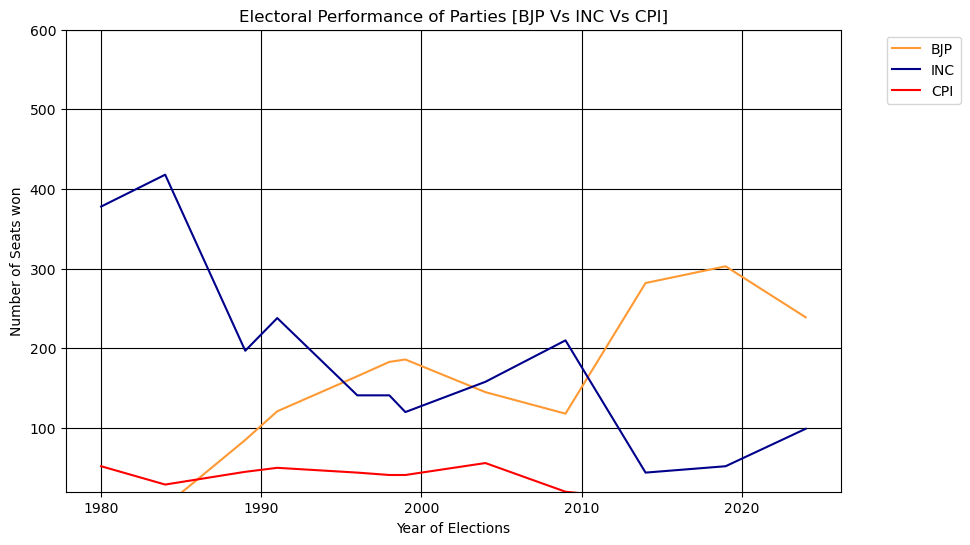

In [86]:
rcParams['figure.figsize'] = 15,6
fig, ax = plt.subplots(figsize=(10, 6)) 
plt.plot(party_wise_performance_yearly_t['BJP'], color = '#ff9933')
plt.plot(party_wise_performance_yearly_t['INC'], color = '#00008b')
plt.plot(party_wise_performance_yearly_t['CPI'], color = '#ff0000')
plt.grid(True, color = 'k', linestyle = '-')
plt.ylim(20,600)
plt.xlabel('Year of Elections')
plt.ylabel('Number of Seats won')
plt.title('Electoral Performance of Parties [BJP Vs INC Vs CPI]')
plt.legend(['BJP', 'INC', 'CPI'], bbox_to_anchor=(1.05, 1), loc = "upper left");

<span style="font-size:24px; font-weight:bold;">
    Constituency Volatility Index (CVI):
</span>
<span style="font-size:18px;">
    Number of times a constituency changed winning party over the years
</span>